In [1]:
# pip install -r requirments.txt -q

In [1]:
# Import Required Libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 60)

In [2]:
# Classification Models
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import RidgeClassifier

from sklearn.model_selection import train_test_split


from sklearn.metrics import accuracy_score, roc_auc_score, balanced_accuracy_score, f1_score, classification_report, confusion_matrix, roc_curve, auc

In [3]:
# Encoding
from sklearn.preprocessing import OrdinalEncoder

# Hyperparameter tunning
from sklearn.model_selection import GridSearchCV

# OverSampling
from imblearn.over_sampling import SMOTE 
from collections import Counter

In [4]:
import pickle
import joblib

In [5]:
df = pd.read_csv(r'src/combined_data.csv')
df

,sk_id_curr,target,name_contract_type_app,code_gender,flag_own_car,cnt_children,amt_income_total,amt_goods_price,name_type_suite_app,name_income_type,name_education_type,name_family_status,name_housing_type,region_population_relative,days_employed,days_registration,days_id_publish,occupation_type,region_rating_client_w_city,weekday_appr_process_start_app,hour_appr_process_start_app,reg_region_not_live_region,reg_region_not_work_region,live_region_not_work_region,reg_city_not_live_city,reg_city_not_work_city,organization_type,ext_source_2,ext_source_3,obs_30_cnt_social_circle,def_30_cnt_social_circle,days_last_phone_change,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year,age,name_contract_type_prev,amt_application,weekday_appr_process_start_prev,hour_appr_process_start_prev,flag_last_appl_per_contract,nflag_last_appl_in_day,name_contract_status,days_decision,name_payment_type,name_client_type,name_portfolio,channel_type,sellerplace_area,name_yield_group,product_combination
0,100002,1,Cash loans,M,0,0,202500.0,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,637,3648.0,2120,Laborers,2,WEDNESDAY,10,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0,25,Consumer loans,179055.0,SATURDAY,9.0,Y,1.0,Approved,606.0,Cash through the bank,New,POS,Stone,500.0,low_normal,POS other with interest
1,100003,0,Cash loans,F,0,0,270000.0,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,1188,1186.0,291,Core staff,1,MONDAY,11,0,0,0,0,0,School,0.622246,0.490049,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,45,Cash loans,900000.0,FRIDAY,12.0,Y,1.0,Approved,746.0,Cash through the bank,Repeater,Cash,Credit and cash offices,-1.0,low_normal,Cash X-Sell: low
2,100003,0,Cash loans,F,0,0,270000.0,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,1188,1186.0,291,Core staff,1,MONDAY,11,0,0,0,0,0,School,0.622246,0.490049,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,45,Consumer loans,337500.0,SUNDAY,17.0,Y,1.0,Approved,828.0,Cash through the bank,Refreshed,POS,Stone,1400.0,middle,POS industry with interest
3,100003,0,Cash loans,F,0,0,270000.0,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,1188,1186.0,291,Core staff,1,MONDAY,11,0,0,0,0,0,School,0.622246,0.490049,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,45,Consumer loans,68809.5,SATURDAY,15.0,Y,1.0,Approved,2341.0,Cash through the bank,Refreshed,POS,Country-wide,200.0,middle,POS household with interest
4,100004,0,Revolving loans,M,1,0,67500.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,225,4260.0,2531,Laborers,2,MONDAY,9,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0,52,Consumer loans,24282.0,FRIDAY,5.0,Y,1.0,Approved,815.0,Cash through the bank,New,POS,Regional / Local,30.0,middle,POS mobile without interest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1403312,456255,0,Cash loans,F,0,0,157500.0,675000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.046220,1262,5128.0,410,Laborers,1,THURSDAY,20,0,0,0,0,1,Business Entity Type 3,0.708569,0.113922,0.0,0.0,787.0,0.0,0.0,0.0,2.0,0.0,1.0,46,Cash loans,229500.0,THURSDAY,12.0,Y,1.0,Approved,648.0,Cash through the bank,Repeater,Cash,Credit and cash offices,-1.0,middle,Cash X-Sell: middle
1403313,456255,0,Cash loans,F,0,0,157500.0,675000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.046220,1262,5128.0,410,Laborers,1,THURSDAY,20,0,0,0,0,1,Business Entity Type 3,0.708569,0.113922,0.0,0.0,787.0,0.0,0.0,0.0,2.0,0.0,1.0,46,Revolving loans,45000.0,SUNDAY,14.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1403317 entries, 0 to 1403316
Data columns (total 54 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   sk_id_curr                       1403317 non-null  int64  
 1   target                           1403317 non-null  int64  
 2   name_contract_type_app           1403317 non-null  object 
 3   code_gender                      1403317 non-null  object 
 4   flag_own_car                     1403317 non-null  int64  
 5   cnt_children                     1403317 non-null  int64  
 6   amt_income_total                 1403317 non-null  float64
 7   amt_goods_price                  1403317 non-null  float64
 8   name_type_suite_app              1403317 non-null  object 
 9   name_income_type                 1403317 non-null  object 
 10  name_education_type              1403317 non-null  object 
 11  name_family_status               1403317 non-null 

# Converting Categorical data into Numerical data.

In [21]:
df.select_dtypes(include = 'object')

,name_contract_type_app,code_gender,name_type_suite_app,name_income_type,name_education_type,name_family_status,name_housing_type,occupation_type,weekday_appr_process_start_app,organization_type,name_contract_type_prev,weekday_appr_process_start_prev,flag_last_appl_per_contract,name_contract_status,name_payment_type,name_client_type,name_portfolio,channel_type,name_yield_group,product_combination
0,Cash loans,M,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,Consumer loans,SATURDAY,Y,Approved,Cash through the bank,New,POS,Stone,low_normal,POS other with interest
1,Cash loans,F,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,Cash loans,FRIDAY,Y,Approved,Cash through the bank,Repeater,Cash,Credit and cash offices,low_normal,Cash X-Sell: low
2,Cash loans,F,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,Consumer loans,SUNDAY,Y,Approved,Cash through the bank,Refreshed,POS,Stone,middle,POS industry with interest
3,Cash loans,F,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,Consumer loans,SATURDAY,Y,Approved,Cash through the bank,Refreshed,POS,Country-wide,middle,POS household with interest
4,Revolving loans,M,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government,Consumer loans,FRIDAY,Y,Approved,Cash through the bank,New,POS,Regional / Local,middle,POS mobile without interest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1403312,Cash loans,F,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,Laborers,THURSDAY,Business Entity Type 3,Cash loans,THURSDAY,Y,Approved,Cash through the bank,Repeater,Cash,Credit and cash offices,middle,Cash X-Sell: middle
1403313,Cash loans,F,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,Laborers,THURSDAY,Business Entity Type 3,Revolving loans,SUNDAY,Y,Refused,Cash through the bank,Repeater,Cards,Country-wide,high,Card Street
1403314,Cash loans,F,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,Laborers,THURSDAY,Business Entity Type 3,Cash loans,FRIDAY,Y,Refused,Cash through the bank,Repeater,Cash,Credit and cash offices,low_normal,Cash Street: low
1403315,Cash loans,F,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,Laborers,THURSDAY,Business Entity Type 3,Cash loans,FRIDAY,Y,Approved,Cash through the bank,Repeater,Cash,AP+ (Cash loan),low_normal,Cash X-Sell: low


In [7]:
gender = {'M':1, 'F':0}
weekdays = {'WEDNESDAY': 3, 'MONDAY': 1, 'THURSDAY': 4, 'SUNDAY': 0, 'SATURDAY': 6, 'FRIDAY': 5, 'TUESDAY': 2}
flag_last_appl = {'Y': 1, 'N': 0}


df['code_gender'] = df['code_gender'].map(gender)
df['weekday_appr_process_start_app'] = df['weekday_appr_process_start_app'].map(weekdays)
df['weekday_appr_process_start_prev'] = df['weekday_appr_process_start_prev'].map(weekdays)
df['flag_last_appl_per_contract'] = df['flag_last_appl_per_contract'].map(flag_last_appl)

df.select_dtypes(include = 'object')

,name_contract_type_app,name_type_suite_app,name_income_type,name_education_type,name_family_status,name_housing_type,occupation_type,organization_type,name_contract_type_prev,name_contract_status,name_payment_type,name_client_type,name_portfolio,channel_type,name_yield_group,product_combination
0,Cash loans,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,Business Entity Type 3,Consumer loans,Approved,Cash through the bank,New,POS,Stone,low_normal,POS other with interest
1,Cash loans,Family,State servant,Higher education,Married,House / apartment,Core staff,School,Cash loans,Approved,Cash through the bank,Repeater,Cash,Credit and cash offices,low_normal,Cash X-Sell: low
2,Cash loans,Family,State servant,Higher education,Married,House / apartment,Core staff,School,Consumer loans,Approved,Cash through the bank,Refreshed,POS,Stone,middle,POS industry with interest
3,Cash loans,Family,State servant,Higher education,Married,House / apartment,Core staff,School,Consumer loans,Approved,Cash through the bank,Refreshed,POS,Country-wide,middle,POS household with interest
4,Revolving loans,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,Government,Consumer loans,Approved,Cash through the bank,New,POS,Regional / Local,middle,POS mobile without interest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1403312,Cash loans,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,Laborers,Business Entity Type 3,Cash loans,Approved,Cash through the bank,Repeater,Cash,Credit and cash offices,middle,Cash X-Sell: middle
1403313,Cash loans,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,Laborers,Business Entity Type 3,Revolving loans,Refused,Cash through the bank,Repeater,Cards,Country-wide,high,Card Street
1403314,Cash loans,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,Laborers,Business Entity Type 3,Cash loans,Refused,Cash through the bank,Repeater,Cash,Credit and cash offices,low_normal,Cash Street: low
1403315,Cash loans,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,Laborers,Business Entity Type 3,Cash loans,Approved,Cash through the bank,Repeater,Cash,AP+ (Cash loan),low_normal,Cash X-Sell: low


In [8]:
enc=OrdinalEncoder()

# Specify categorical column names for ordinal encoding
column_names = df.select_dtypes(include = 'object').columns

# Dictionary to store unique values before and after ordinal encoding
unique_value ={'code_gender': gender,
               'weekday_appr_process_start_app': weekdays,
               'weekday_appr_process_start_prev': weekdays,
               'flag_last_appl_per_contract':flag_last_appl}
for col_name in column_names:
    data = df[col_name].unique()
    data.sort()

    df[col_name] = enc.fit_transform(df[[col_name]])

    globals()[col_name] = {}
    for i in df[col_name].unique():
        globals()[col_name][data[int(i)]] = i
        unique_value[f'{col_name}'] = globals()[col_name]
    
unique_value

{'code_gender': {'M': 1, 'F': 0},
 'weekday_appr_process_start_app': {'WEDNESDAY': 3,
  'MONDAY': 1,
  'THURSDAY': 4,
  'SUNDAY': 0,
  'SATURDAY': 6,
  'FRIDAY': 5,
  'TUESDAY': 2},
 'weekday_appr_process_start_prev': {'WEDNESDAY': 3,
  'MONDAY': 1,
  'THURSDAY': 4,
  'SUNDAY': 0,
  'SATURDAY': 6,
  'FRIDAY': 5,
  'TUESDAY': 2},
 'flag_last_appl_per_contract': {'Y': 1, 'N': 0},
 'name_contract_type_app': {'Cash loans': 0.0, 'Revolving loans': 1.0},
 'name_type_suite_app': {'Unaccompanied': 6.0,
  'Family': 1.0,
  'Spouse, partner': 5.0,
  'Children': 0.0,
  'Other_A': 3.0,
  'Group of people': 2.0,
  'Other_B': 4.0},
 'name_income_type': {'Working': 6.0,
  'State servant': 3.0,
  'Commercial associate': 0.0,
  'Pensioner': 2.0,
  'Unemployed': 5.0,
  'Student': 4.0,
  'Maternity leave': 1.0},
 'name_education_type': {'Secondary / secondary special': 4.0,
  'Higher education': 1.0,
  'Incomplete higher': 2.0,
  'Lower secondary': 3.0,
  'Academic degree': 0.0},
 'name_family_status': {'

In [9]:
import json
# Write the unique_value dictionary to a JSON file with proper indentation
with open('src/Category_Columns_Encoded_Data.json', 'w') as file:
    json.dump(unique_value, file , indent = 4)

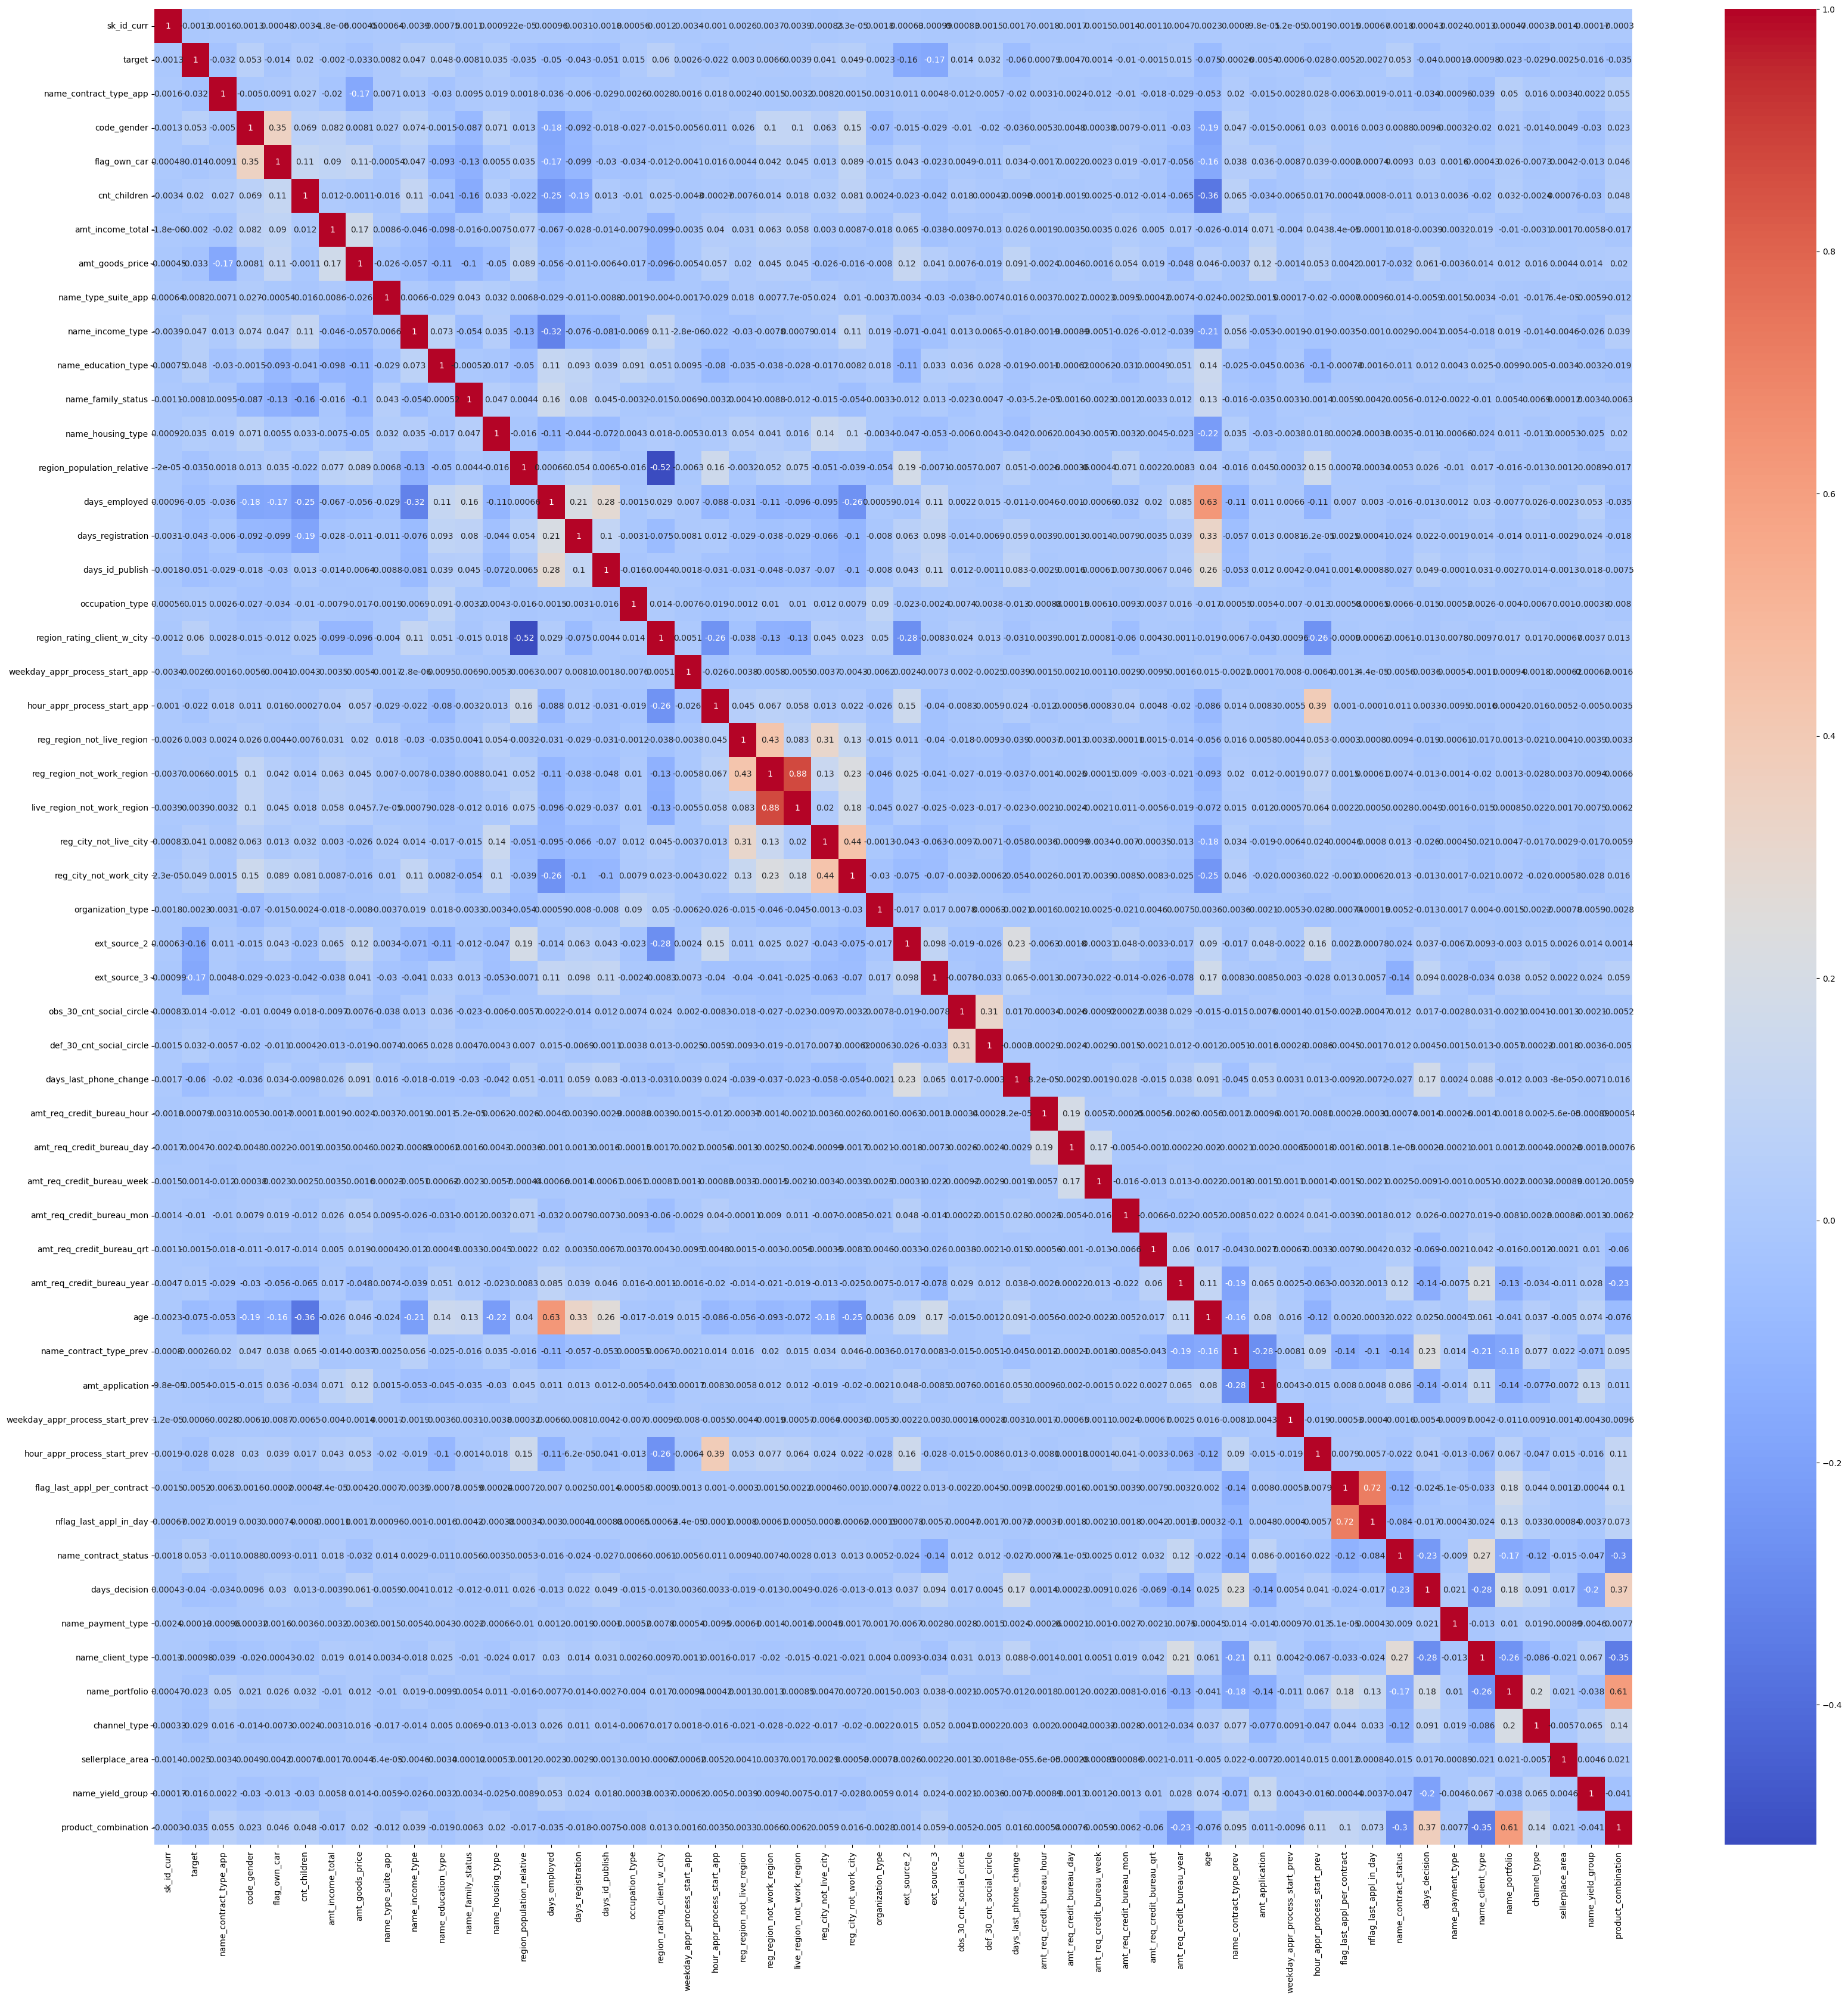

In [10]:
plt.figure(figsize=(40, 40))

sns.heatmap(data = df.corr(), annot=True, cmap = 'coolwarm')

plt.show()

### Handling Imbalance Dataset

In [11]:
df.target.value_counts()

target
0    1281768
1     121549
Name: count, dtype: int64

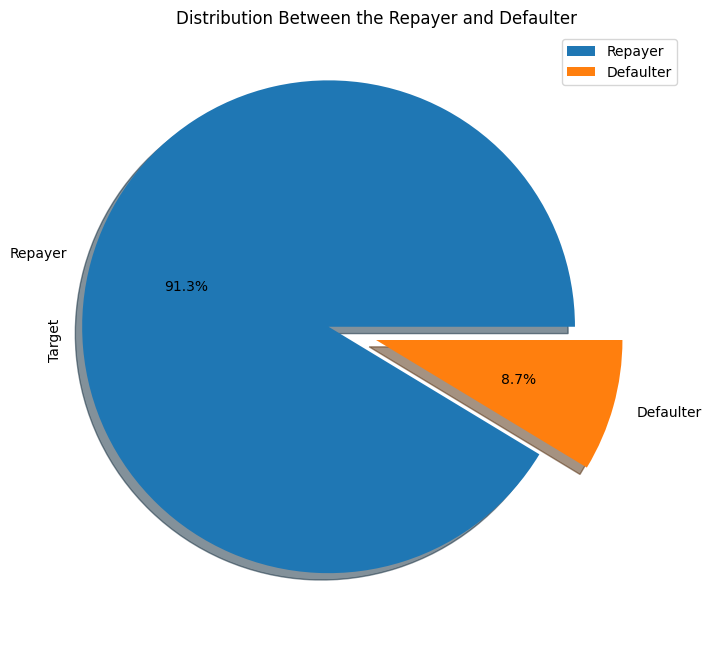

In [12]:
# Distribution Between the Repayer and Defaulter
plt.figure(figsize = (8, 8))
plt.pie(x =df.target.value_counts(), labels = ['Repayer', 'Defaulter'], explode = [0.2, 0], shadow = True, autopct='%1.1f%%' )
plt.legend()
plt.title('Distribution Between the Repayer and Defaulter')
plt.ylabel('Target')
plt.show()

### Loan Repayment and Dataset Imbalance Analysis

- 8.7% of clients are defaulters who have difficulties repaying loans. The remaining clients successfully repay their loans.
- Our dataset is imbalanced, with far fewer defaulters compared to repayers.
- This imbalance can reduce the performance of a classification model, causing it to be biased towards the majority class (repayers).
- To address this, we will use SMOTE (Synthetic Minority Over-sampling Technique) to balance the dataset.

In [24]:

# Prepare your data
X = df.drop(columns=['target'])
y = df['target']

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the new class distribution
print("Original target distribution:", Counter(y_train))
print("Resampled target distribution:", Counter(y_train_resampled))

Original target distribution: Counter({0: 1025603, 1: 97050})
Resampled target distribution: Counter({0: 1025603, 1: 1025603})


## Classification

In [14]:
def model_test(model_name):
    model = model_name()
    model.fit(X_train_resampled, y_train_resampled)

    y_pred = model.predict(X_train)
    print('Training Scores \n\n')
    print('Training Dataset Accuracy : ', accuracy_score(y_pred, y_train))

    print("Train Dataset Classificatin Report : \n\n", classification_report(y_pred, y_train))

    y_pred = model.predict(X_test)

    print('Testing Scores \n\n')
    print('Test Dataset Confusion matrix \n\n:', confusion_matrix(y_test, y_pred))
    print('Test Dataset Accuracy : ', accuracy_score(y_pred, y_test))
    print("Test Dataset Classificatin Report : \n\n", classification_report(y_pred, y_test))

    return model

In [16]:
AdaBoost = model_test(AdaBoostClassifier)

Training Scores 


Training Dataset Accuracy :  0.8336698873115735
Train Dataset Classificatin Report : 

               precision    recall  f1-score   support

           0       0.89      0.92      0.91    988676
           1       0.23      0.17      0.19    133977

    accuracy                           0.83   1122653
   macro avg       0.56      0.54      0.55   1122653
weighted avg       0.81      0.83      0.82   1122653

Testing Scores 


Test Dataset Confusion matrix 

: [[228129  28036]
 [ 18884   5615]]
Test Dataset Accuracy :  0.8328250149645128
Test Dataset Classificatin Report : 

               precision    recall  f1-score   support

           0       0.89      0.92      0.91    247013
           1       0.23      0.17      0.19     33651

    accuracy                           0.83    280664
   macro avg       0.56      0.55      0.55    280664
weighted avg       0.81      0.83      0.82    280664



In [17]:
RandomForest = model_test(RandomForestClassifier)


Training Scores 


Training Dataset Accuracy :  0.9999991092528145
Train Dataset Classificatin Report : 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1025604
           1       1.00      1.00      1.00     97049

    accuracy                           1.00   1122653
   macro avg       1.00      1.00      1.00   1122653
weighted avg       1.00      1.00      1.00   1122653

Testing Scores 


Test Dataset Confusion matrix 

: [[256080     85]
 [ 17411   7088]]
Test Dataset Accuracy :  0.937662115554542
Test Dataset Classificatin Report : 

               precision    recall  f1-score   support

           0       1.00      0.94      0.97    273491
           1       0.29      0.99      0.45      7173

    accuracy                           0.94    280664
   macro avg       0.64      0.96      0.71    280664
weighted avg       0.98      0.94      0.95    280664



In [18]:
ExtraTrees = model_test(ExtraTreesClassifier)


Training Scores 


Training Dataset Accuracy :  1.0
Train Dataset Classificatin Report : 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1025603
           1       1.00      1.00      1.00     97050

    accuracy                           1.00   1122653
   macro avg       1.00      1.00      1.00   1122653
weighted avg       1.00      1.00      1.00   1122653

Testing Scores 


Test Dataset Confusion matrix 

: [[255406    759]
 [ 11720  12779]]
Test Dataset Accuracy :  0.95553758230482
Test Dataset Classificatin Report : 

               precision    recall  f1-score   support

           0       1.00      0.96      0.98    267126
           1       0.52      0.94      0.67     13538

    accuracy                           0.96    280664
   macro avg       0.76      0.95      0.82    280664
weighted avg       0.97      0.96      0.96    280664



In [19]:
Gradient = model_test(GradientBoostingClassifier)

Training Scores 


Training Dataset Accuracy :  0.9044949775219948
Train Dataset Classificatin Report : 

               precision    recall  f1-score   support

           0       0.98      0.92      0.95   1097196
           1       0.08      0.30      0.12     25457

    accuracy                           0.90   1122653
   macro avg       0.53      0.61      0.54   1122653
weighted avg       0.96      0.90      0.93   1122653

Testing Scores 


Test Dataset Confusion matrix 

: [[251524   4641]
 [ 22508   1991]]
Test Dataset Accuracy :  0.9032686771370749
Test Dataset Classificatin Report : 

               precision    recall  f1-score   support

           0       0.98      0.92      0.95    274032
           1       0.08      0.30      0.13      6632

    accuracy                           0.90    280664
   macro avg       0.53      0.61      0.54    280664
weighted avg       0.96      0.90      0.93    280664



In [20]:
HistGradient = model_test(HistGradientBoostingClassifier)


Training Scores 


Training Dataset Accuracy :  0.9138130838291084
Train Dataset Classificatin Report : 

               precision    recall  f1-score   support

           0       1.00      0.92      0.95   1115193
           1       0.04      0.52      0.07      7460

    accuracy                           0.91   1122653
   macro avg       0.52      0.72      0.51   1122653
weighted avg       0.99      0.91      0.95   1122653

Testing Scores 


Test Dataset Confusion matrix 

: [[255166    999]
 [ 23479   1020]]
Test Dataset Accuracy :  0.9127853946355785
Test Dataset Classificatin Report : 

               precision    recall  f1-score   support

           0       1.00      0.92      0.95    278645
           1       0.04      0.51      0.08      2019

    accuracy                           0.91    280664
   macro avg       0.52      0.71      0.52    280664
weighted avg       0.99      0.91      0.95    280664



In [21]:
Bagging = model_test(BaggingClassifier)


Training Scores 


Training Dataset Accuracy :  0.9928722410219364
Train Dataset Classificatin Report : 

               precision    recall  f1-score   support

           0       1.00      0.99      1.00   1033503
           1       0.92      1.00      0.96     89150

    accuracy                           0.99   1122653
   macro avg       0.96      1.00      0.98   1122653
weighted avg       0.99      0.99      0.99   1122653

Testing Scores 


Test Dataset Confusion matrix 

: [[254755   1410]
 [ 16827   7672]]
Test Dataset Accuracy :  0.9350219479519996
Test Dataset Classificatin Report : 

               precision    recall  f1-score   support

           0       0.99      0.94      0.97    271582
           1       0.31      0.84      0.46      9082

    accuracy                           0.94    280664
   macro avg       0.65      0.89      0.71    280664
weighted avg       0.97      0.94      0.95    280664



In [22]:
ExtraTree = model_test(ExtraTreeClassifier)


Training Scores 


Training Dataset Accuracy :  1.0
Train Dataset Classificatin Report : 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1025603
           1       1.00      1.00      1.00     97050

    accuracy                           1.00   1122653
   macro avg       1.00      1.00      1.00   1122653
weighted avg       1.00      1.00      1.00   1122653

Testing Scores 


Test Dataset Confusion matrix 

: [[229381  26784]
 [ 10648  13851]]
Test Dataset Accuracy :  0.8666305618105635
Test Dataset Classificatin Report : 

               precision    recall  f1-score   support

           0       0.90      0.96      0.92    240029
           1       0.57      0.34      0.43     40635

    accuracy                           0.87    280664
   macro avg       0.73      0.65      0.67    280664
weighted avg       0.85      0.87      0.85    280664



In [23]:
DecisionTree = model_test(DecisionTreeClassifier)


Training Scores 


Training Dataset Accuracy :  1.0
Train Dataset Classificatin Report : 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1025603
           1       1.00      1.00      1.00     97050

    accuracy                           1.00   1122653
   macro avg       1.00      1.00      1.00   1122653
weighted avg       1.00      1.00      1.00   1122653

Testing Scores 


Test Dataset Confusion matrix 

: [[237633  18532]
 [ 13254  11245]]
Test Dataset Accuracy :  0.886747142490665
Test Dataset Classificatin Report : 

               precision    recall  f1-score   support

           0       0.93      0.95      0.94    250887
           1       0.46      0.38      0.41     29777

    accuracy                           0.89    280664
   macro avg       0.69      0.66      0.68    280664
weighted avg       0.88      0.89      0.88    280664



In [24]:
xgb = model_test(XGBClassifier)


Training Scores 


Training Dataset Accuracy :  0.9187727641577584
Train Dataset Classificatin Report : 

               precision    recall  f1-score   support

           0       1.00      0.92      0.96   1110385
           1       0.09      0.74      0.17     12268

    accuracy                           0.92   1122653
   macro avg       0.55      0.83      0.56   1122653
weighted avg       0.99      0.92      0.95   1122653

Testing Scores 


Test Dataset Confusion matrix 

: [[255253    912]
 [ 22446   2053]]
Test Dataset Accuracy :  0.9167759313627682
Test Dataset Classificatin Report : 

               precision    recall  f1-score   support

           0       1.00      0.92      0.96    277699
           1       0.08      0.69      0.15      2965

    accuracy                           0.92    280664
   macro avg       0.54      0.81      0.55    280664
weighted avg       0.99      0.92      0.95    280664



In [15]:
lgbm = model_test(LGBMClassifier)


[LightGBM] [Info] Number of positive: 1025603, number of negative: 1025603
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.217251 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10056
[LightGBM] [Info] Number of data points in the train set: 2051206, number of used features: 53
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Training Scores 


Training Dataset Accuracy :  0.9138175375650357
Train Dataset Classificatin Report : 

               precision    recall  f1-score   support

           0       1.00      0.92      0.95   1115534
           1       0.04      0.52      0.07      7119

    accuracy                           0.91   1122653
   macro avg       0.52      0.72      0.51   1122653
weighted avg       0.99      0.91      0.95   1122653

Testing Scores 


Test Dataset Confusion matrix 

: [[25

In [16]:
ridge = model_test(RidgeClassifier)

Training Scores 


Training Dataset Accuracy :  0.700207455019494
Train Dataset Classificatin Report : 

               precision    recall  f1-score   support

           0       0.71      0.94      0.81    777266
           1       0.55      0.15      0.24    345387

    accuracy                           0.70   1122653
   macro avg       0.63      0.55      0.53   1122653
weighted avg       0.66      0.70      0.64   1122653

Testing Scores 


Test Dataset Confusion matrix 

: [[182996  73169]
 [ 10967  13532]]
Test Dataset Accuracy :  0.7002251802867485
Test Dataset Classificatin Report : 

               precision    recall  f1-score   support

           0       0.71      0.94      0.81    193963
           1       0.55      0.16      0.24     86701

    accuracy                           0.70    280664
   macro avg       0.63      0.55      0.53    280664
weighted avg       0.66      0.70      0.64    280664



### Model Selection Process

I have built multiple classification models to identify the best one for predicting loan repayment. Among the models built, I selected the following three models for detailed comparison:

1. **RandomForestClassifier**
2. **ExtraTreesClassifier**
3. **BaggingClassifier**

### Performance Comparison

The performance of these models was evaluated based on their confusion matrices, accuracy, and classification reports. Here are the details:

#### RandomForestClassifier
- **Confusion Matrix**:
  ```
  [[256080     85]
   [ 17411   7088]]
  ```
- **Accuracy**: 93.77%
- **Classification Report**:
  - Precision (Class 1): 0.29
  - Recall (Class 1): 0.99
  - F1-Score (Class 1): 0.45
  - Weighted avg Precision: 0.98
  - Weighted avg Recall: 0.94
  - Weighted avg F1-Score: 0.95

#### ExtraTreesClassifier
- **Confusion Matrix**:
  ```
  [[255406    759]
   [ 11720  12779]]
  ```
- **Accuracy**: 95.55%
- **Classification Report**:
  - Precision (Class 1): 0.52
  - Recall (Class 1): 0.94
  - F1-Score (Class 1): 0.67
  - Weighted avg Precision: 0.97
  - Weighted avg Recall: 0.96
  - Weighted avg F1-Score: 0.96

#### BaggingClassifier
- **Confusion Matrix**:
  ```
  [[254755   1410]
   [ 16827   7672]]
  ```
- **Accuracy**: 93.50%
- **Classification Report**:
  - Precision (Class 1): 0.31
  - Recall (Class 1): 0.84
  - F1-Score (Class 1): 0.46
  - Weighted avg Precision: 0.97
  - Weighted avg Recall: 0.94
  - Weighted avg F1-Score: 0.95

### Model Selection

Based on the performance metrics, the **ExtraTreesClassifier** model was chosen as the best model. Here are the key reasons for selecting ExtraTreesClassifier:

- **Accuracy**: It has the highest accuracy (95.55%) among the three models.
- **Minority Class Performance**: It offers the best balance for the minority class (Class 1) with a precision of 0.52 and recall of 0.94, resulting in the highest F1-score (0.67) for Class 1.
- **Overall Performance**: The weighted average precision, recall, and F1-score are also the highest for ExtraTreesClassifier, indicating strong overall performance.

### Conclusion

The **ExtraTreesClassifier** model was selected for its superior performance in accuracy and its balanced handling of the minority class, making it the most reliable choice for predicting loan repayment outcomes.

#### Hyperparameter Tuning

In [1]:


# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [ 10, 20],
    'min_samples_split': [2, 5, 10]
}
# Initialize the ExtraTreesClassifier
etc = ExtraTreesClassifier(random_state=42)
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=etc, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
# Fit GridSearchCV on the training data
grid_search.fit(X_train_resampled, y_train_resampled)
# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best parameters found: ", best_params)
print("Best cross-validation score: ", best_score)
# Train the ExtraTreesClassifier with the best parameters
best_etc = ExtraTreesClassifier(**best_params, random_state=42)
best_etc.fit(X_train_resampled, y_train_resampled)
# Predict on the test data
y_pred = best_etc.predict(X_test)
# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters found:  {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation score:  0.9130404748971419
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.92      0.93    256165
           1       0.33      0.43      0.38     24499

    accuracy                           0.88    280664
   macro avg       0.64      0.67      0.65    280664
weighted avg       0.89      0.88      0.88    280664


In [2]:
estimators= [100, 200, 300]
max_depths=[ 10, 20, 30]
min_samples_splits=[2, 3, 6]
min_samples_leafs=[1, 2, 3]

for estimator in estimators:
    for depth in max_depths:
        for split in min_samples_splits:
            for leaf in min_samples_leafs:
                print(f'Parameters : n_estimators= {estimator}, max_depth= {depth}, min_samples_split= {split}, min_samples_leaf={leaf}')
                model = ExtraTreesClassifier(n_estimators= estimator, max_depth= depth,
                                             min_samples_split= split, min_samples_leaf=leaf)
                model.fit(X_train_resampled, y_train_resampled)

                y_pred = model.predict(X_test)

                print('Testing Scores \n\n')
                print('Test Dataset Confusion matrix \n\n:', confusion_matrix(y_test, y_pred))
                print('Test Dataset Accuracy : ', accuracy_score(y_pred, y_test))
                print("Test Dataset Classificatin Report : \n\n", classification_report(y_pred, y_test))

Parameters : n_estimators= 100, max_depth= 10, min_samples_split= 2, min_samples_leaf=1
Testing Scores 


Test Dataset Confusion matrix 

: [[206287  49878]
 [ 14055  10444]]
Test Dataset Accuracy :  0.7722080494826554
Test Dataset Classificatin Report : 

               precision    recall  f1-score   support

           0       0.81      0.94      0.87    220342
           1       0.43      0.17      0.25     60322

    accuracy                           0.77    280664
   macro avg       0.62      0.55      0.56    280664
weighted avg       0.72      0.77      0.73    280664

Parameters : n_estimators= 100, max_depth= 10, min_samples_split= 2, min_samples_leaf=2
Testing Scores 


Test Dataset Confusion matrix 

: [[207117  49048]
 [ 13974  10525]]
Test Dataset Accuracy :  0.7754539235527178
Test Dataset Classificatin Report : 

               precision    recall  f1-score   support

           0       0.81      0.94      0.87    221091
           1       0.43      0.18      0.25     

In [4]:
estimators= [200, 300, 400]
max_depths=[ 30, 20]
min_samples_splits=[2, 3, 6]
min_samples_leafs=[1, 2, 3]
# bootstrap= [False, True]

for estimator in estimators:
    for depth in max_depths:
        for split in min_samples_splits:
            for leaf in min_samples_leafs:
                print(f'Parameters : n_estimators= {estimator}, max_depth= {depth}, min_samples_split= {split}, min_samples_leaf={leaf}')
                model = ExtraTreesClassifier(n_estimators= estimator, max_depth= depth,
                                             min_samples_split= split, min_samples_leaf=leaf)
                model.fit(X_train_resampled, y_train_resampled)

                y_pred = model.predict(X_test)

                print('Testing Scores \n\n')
                print('Test Dataset Confusion matrix \n\n:', confusion_matrix(y_test, y_pred))
                print('Test Dataset Accuracy : ', accuracy_score(y_pred, y_test))
                print("Test Dataset Classificatin Report : \n\n", classification_report(y_pred, y_test))

Parameters : n_estimators= 200, max_depth= 30, min_samples_split= 2, min_samples_leaf=1
Testing Scores 


Test Dataset Confusion matrix 

: [[251916   4249]
 [ 11903  12596]]
Test Dataset Accuracy :  0.9424507596271698
Test Dataset Classificatin Report : 

               precision    recall  f1-score   support

           0       0.98      0.95      0.97    263819
           1       0.51      0.75      0.61     16845

    accuracy                           0.94    280664
   macro avg       0.75      0.85      0.79    280664
weighted avg       0.96      0.94      0.95    280664

Parameters : n_estimators= 200, max_depth= 30, min_samples_split= 2, min_samples_leaf=2
Testing Scores 


Test Dataset Confusion matrix 

: [[251338   4827]
 [ 13152  11347]]
Test Dataset Accuracy :  0.9359411965909414
Test Dataset Classificatin Report : 

               precision    recall  f1-score   support

           0       0.98      0.95      0.97    264490
           1       0.46      0.70      0.56     

In [5]:
model = ExtraTreesClassifier(n_estimators= 400, max_depth= 54,
                                min_samples_split= 2, min_samples_leaf=1)
model.fit(X_train_resampled, y_train_resampled)

y_pred = model.predict(X_test)

print('Testing Scores \n\n')
print('Test Dataset Confusion matrix \n\n:', confusion_matrix(y_test, y_pred))
print('Test Dataset Accuracy : ', accuracy_score(y_pred, y_test))
print("Test Dataset Classificatin Report : \n\n", classification_report(y_pred, y_test))

Testing Scores 


Test Dataset Confusion matrix 

: [[255454    711]
 [ 11654  12845]]
Test Dataset Accuracy :  0.9559437619359804
Test Dataset Classificatin Report : 

               precision    recall  f1-score   support

           0       1.00      0.96      0.98    267108
           1       0.52      0.95      0.68     13556

    accuracy                           0.96    280664
   macro avg       0.76      0.95      0.83    280664
weighted avg       0.97      0.96      0.96    280664


### Choosing the Default Model: A Simple Comparison

After comparing the performance of the ExtraTreesClassifier with and without hyperparameter tuning, we observed the following:

#### Without Hyperparameter Tuning:
- **Confusion Matrix**:
  - True Positives: 255,454
  - False Positives: 711
  - False Negatives: 11,654
  - True Negatives: 12,845
- **Accuracy**: 95.59%
- **Classification Report**:
  - Precision for Class 0: 100%
  - Recall for Class 0: 96%
  - Precision for Class 1: 52%
  - Recall for Class 1: 95%
  - F1-score for Class 0: 98%
  - F1-score for Class 1: 68%

#### With Hyperparameter Tuning:
- **Confusion Matrix**:
  - True Positives: 255,406
  - False Positives: 759
  - False Negatives: 11,720
  - True Negatives: 12,779
- **Accuracy**: 95.55%
- **Classification Report**:
  - Precision for Class 0: 100%
  - Recall for Class 0: 96%
  - Precision for Class 1: 52%
  - Recall for Class 1: 94%
  - F1-score for Class 0: 98%
  - F1-score for Class 1: 67%

#### Conclusion:
Both models achieved nearly the same accuracy and performance metrics. However, the model without hyperparameter tuning has a lower maximum depth, which means it is simpler and likely smaller in size.

**Decision**:
We chose the default ExtraTreesClassifier model because it provides similar performance with a simpler structure.

This allows for easier interpretation, reduced training time, and potentially faster predictions in deployment.

In [10]:
defalter_cls = ExtraTreesClassifier()
defalter_cls.fit(X_train_resampled, y_train_resampled)

y_pred = defalter_cls.predict(X_test)

print('Testing Scores \n\n')
print('Test Dataset Confusion matrix \n\n:', confusion_matrix(y_test, y_pred))
print('Test Dataset Accuracy : ', accuracy_score(y_pred, y_test))
print("Test Dataset Classificatin Report : \n\n", classification_report(y_pred, y_test))

Testing Scores 


Test Dataset Confusion matrix 

: [[255372    793]
 [ 11860  12639]]
Test Dataset Accuracy :  0.9549176239204173
Test Dataset Classificatin Report : 

               precision    recall  f1-score   support

           0       1.00      0.96      0.98    267232
           1       0.52      0.94      0.67     13432

    accuracy                           0.95    280664
   macro avg       0.76      0.95      0.82    280664
weighted avg       0.97      0.95      0.96    280664




In [33]:
# Create a confusion matrix
cm_df = pd.DataFrame(confusion_matrix(y_test, y_pred))
cm_df.columns=[f'Predicted {i}' for i in [0, 1]]
cm_df=cm_df.rename(index={i:f'Actual {i}' for i in df['target'].unique()})
# Calculate accuracy manually
accuracy = 0
for i in range(cm_df.shape[0]):
  accuracy += cm_df.iloc[i,i]
accuracy = accuracy / cm_df.sum().sum()
print('Test Accuracy Score :', accuracy)
cm_df

Test Accuracy Score : 0.9549176239204173


,Predicted 0,Predicted 1
Actual 0,255372,793
Actual 1,11860,12639


In [40]:
# Get predicted probabilities for the positive class
y_probs = defalter_cls.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

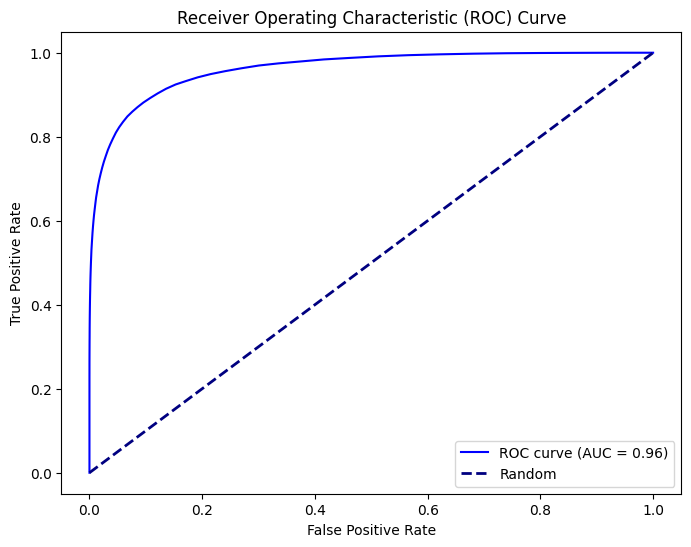

In [41]:
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=1.5, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Save the ExtraTrees Classification model into a  pickle file
with open('Defaulter_prediction.pkl', 'wb') as file:
    pickle.dump(defalter_cls, file)

In [ ]:
# Save the model to a compressed joblib file
joblib.dump(defalter_cls, 'Defaulter_prediction.joblib.gz', compress=('gzip', 3))

In [ ]:
classification = joblib.load('Defaulter_prediction.joblib.gz')

In [49]:
classification.predict(X_test[140:152])

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1])